### Gradient descent for simple Linear Regression with ordinary derivative

Epoch: 1:
Current weight: 4.388
(MSE) is the average of the squares of the errors between the predicted y (w*x) and actual y.: 43.561099999999996
Gradient for single param variable is ordinary derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE -43.78
The gradient is the partial derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE.


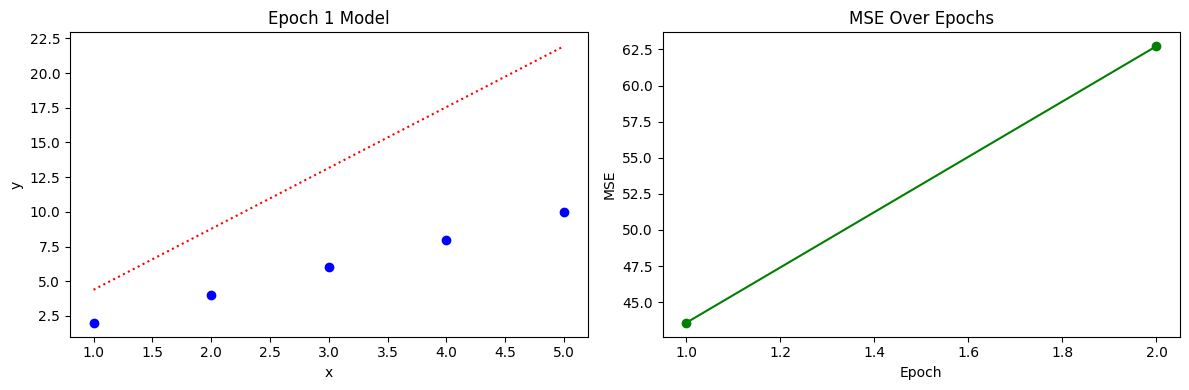

Epoch: 2:
Current weight: -0.8655999999999997
(MSE) is the average of the squares of the errors between the predicted y (w*x) and actual y.: 62.72798399999999
Gradient for single param variable is ordinary derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE 52.535999999999994
The gradient is the partial derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE.


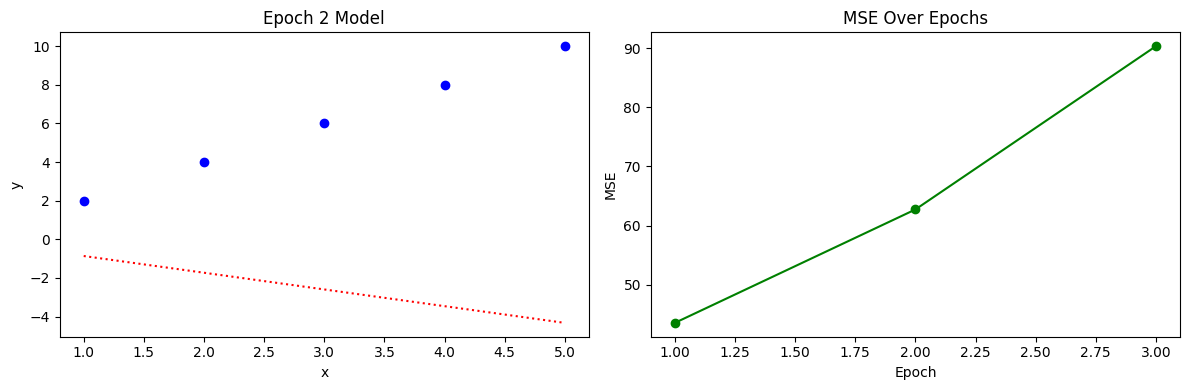

Epoch: 3:
Current weight: 5.438720000000001
(MSE) is the average of the squares of the errors between the predicted y (w*x) and actual y.: 90.32829695999997
Gradient for single param variable is ordinary derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE -63.043200000000006
The gradient is the partial derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE.


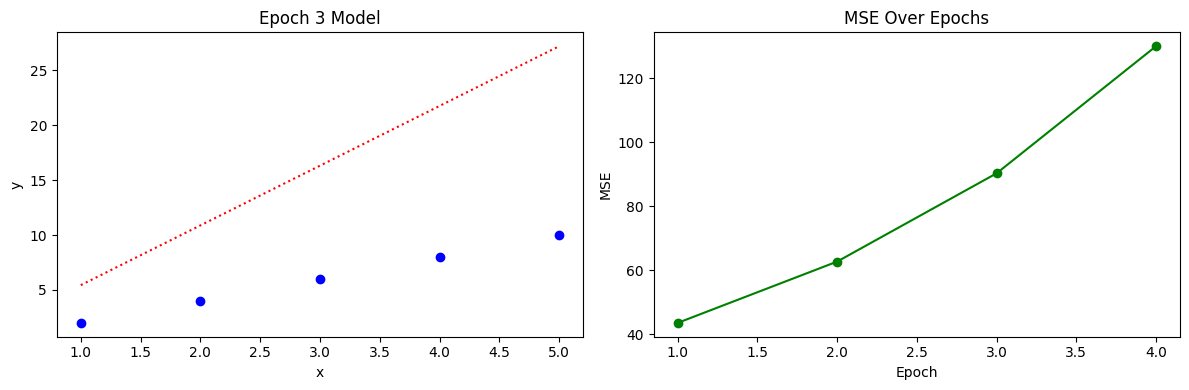

Epoch: 4:
Current weight: -2.1264640000000012
(MSE) is the average of the squares of the errors between the predicted y (w*x) and actual y.: 130.07274762240004
Gradient for single param variable is ordinary derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE 75.65184000000002
The gradient is the partial derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE.


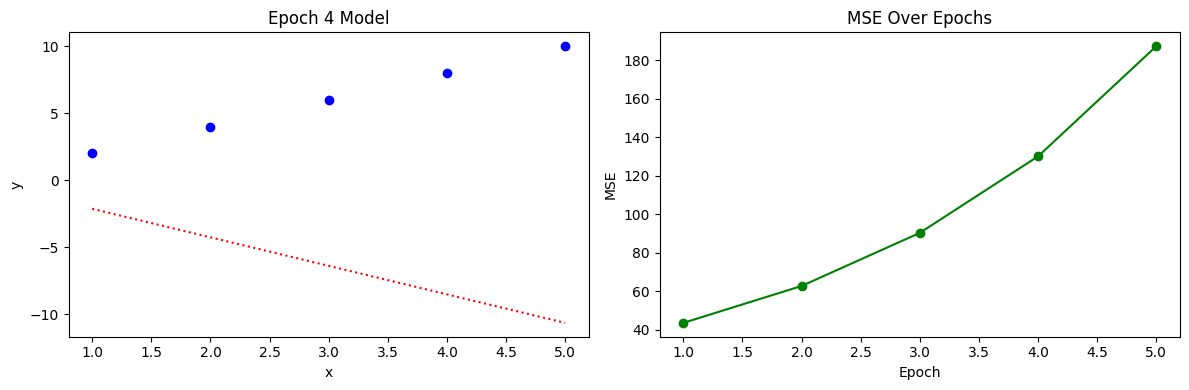

Epoch: 5:
Current weight: 6.951756800000003
(MSE) is the average of the squares of the errors between the predicted y (w*x) and actual y.: 187.30475657625612
Gradient for single param variable is ordinary derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE -90.78220800000004
The gradient is the partial derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE.


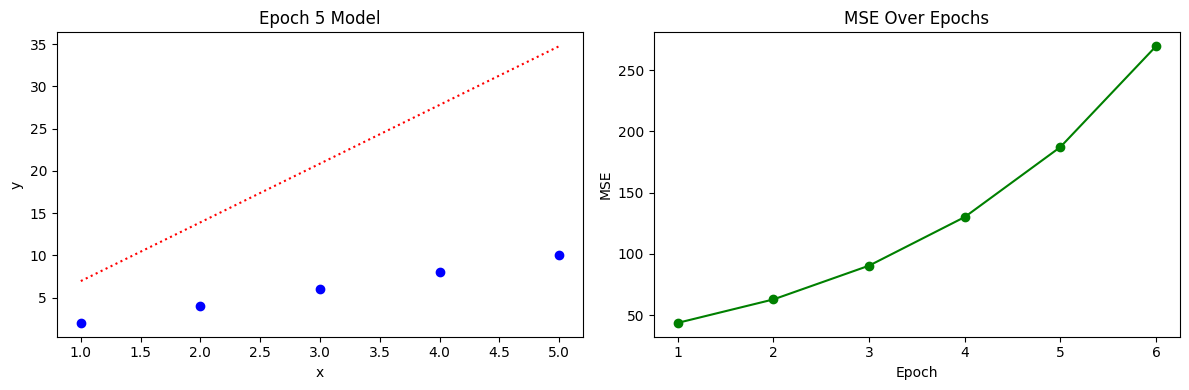

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
y = np.array([2, 4, 6, 8, 10])
x = np.array([1, 2, 3, 4, 5])
n = len(x)

# Function to calculate MSE
def calculate_mse(w, x, y):
    """
    Compute gradient: 
    The value of the MSE is informative and is often used to monitor the performance and convergence of the model during training.
    Calculate the gradient of the cost function (which is the MSE in this context) with respect to the weights. 
    This tells us how much the cost would change if we made a small change to the weight.
    """
    errors = (w * x - y) ** 2
    mse = errors.mean()
    return mse

# Function to plot the current model
def plot_current_model(w, x, y, epoch, mse_history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # Create two subplots

    # First subplot: Plotting the current model
    axs[0].scatter(x, y, color='blue')  # Plot the data points
    y_pred = w * x
    axs[0].plot(x, y_pred, color='red', linestyle='dotted')  # Plot the line
    axs[0].set_title(f'Epoch {epoch+1} Model')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')

    # Second subplot: Plotting the MSE history
    epochs = range(1, len(mse_history) + 1)  # Correcting the range for epochs
    axs[1].plot(epochs, mse_history, marker='o', color='green')
    axs[1].set_title('Loss Function MSE Over Epochs')
    axs[1].set_xlabel('MSE / w')
    axs[1].set_ylabel('MSE')

    plt.tight_layout()  # Adjust layout for better appearance
    plt.show()



# Gradient Descent Function
def gradient_descent(x, y, learning_rate, epochs):
    w = 0.01  # Start with an arbitrary weight
    mse_history = [calculate_mse(w, x, y)]

    for epoch in range(epochs):
        #MSE 
        mse = calculate_mse(w,x,y)

        # Calculate the Gradient (remember this is MSE formula but for each of the point)
        # Calculate the error for each data point (this is our Y, 'how Y changes if `w` changes')
        errors = y - w * x  # y is actual values, w * x is predicted values

        # Step 1: Apply the POWER RULE by multiplying errors by 2
        # Power rule example: The derivative of x^2 with respect to x is 2x.
        doubled_errors = 2 * errors

        # Step 2: Differentiate the inner function using the CHAIN RULE
        # Chain rule example: If f = g(h(x)), then f' = g'(h(x)) * h'(x).
        # Here, g(x) = x^2 (squared function) and h(x) = y_i - w * x_i (linear function).
        # The derivative of g(h(x)) with respect to w is 2 * (y_i - w * x_i) * -x_i.
        differentiated_term = doubled_errors * x

        # Combine the results and average
        # Sum the differentiated terms for all data points and divide by the number of points (n) to get the average gradient.
        gradient = (-1 / n) * np.sum(differentiated_term)

        # Step 3: update the weight
        w -= learning_rate * gradient
        mse_history.append(calculate_mse(w, x, y))

        # Print detailed explanation
        print(f'Epoch: {epoch+1}:')
        print(f'Current weight: {w}')
        print(f'(MSE) is the average of the squares of the errors between the predicted y (w*x) and actual y.: {mse}')
        print(f'Gradient for single param variable is ordinary derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE {gradient}')
        print('The gradient is the partial derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE.')
        
        # Call the function to plot the current model
        plot_current_model(w, x, y, epoch, mse_history)
    
    return w

# Perform Gradient Descent
optimized_w = gradient_descent(x, y, learning_rate=0.01, epochs=10)
